In [ ]:
import pandas as pd
import requests
import numpy as np
import cn2an
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
output_file_name = "data-10-year" 
url = "https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/6a997c9331540da63017746c8eda7a25?q=VTJGc2RHVmtYMTlVOFo0QXNaZFNMRXplb3pGRGVmN0tGSXVITG56dG9paXB6bUMrSWRmVzNYZUtzT000cHpGa3VSMXhVSGl3V0hnOVRpZnJqTGY4OEJ5VFMxbkRQeitNWTNOQmd3TDdtVlNkK0JCcWorNVNGS3VTSlJmc3dlK1pvWkZzMncvR1hrWmpjNEVtWmlHRklKK3dOQTgxa1BqcjdLWnZ1QVJZazdka1hJNENEekkrdVpLdTFFcHZVTXVtQ0N4YnFKNEhxdWRMT2VkOWFRTS9KbVQ4N0JNQ0tKYVE2cXc2eXhWaXc0aklTR2t3cVlHVis2Y1Q2a2R0a2Q5WVdzQkZZUHlTSWRhN3UvQXpFU1lPeVZrazdoWmVFeG0xV0lrMitYcFNBVjQzbWllR2dyaEJjMFo2Vmg4eW56cmV2Vmh5U3lDZ3dSNGZBSnUxMGxheE9pcTh2bWpWU0RVNm51aTNlNWNSMEZ4Qkh6ZVliYXcyYnZMWi81TE1ocnkweldzRTJUTDlXNDhlNGpZVkV0QVNzVnZ5RDlqbEpUMEhRNUwyS2ZaRkFmSzRYckJKRWM2SmFOUnpEeE1hT3ZDZHFmV25YenowYlA0ZElHZEJSSWZBTnBucVEvWUhIazd0ZnJlT3gvcVNGL1BzOS90N0RQNzV2dlJBajhyT0lwZlZ0SEQwTVB2aENZOWQ2aCtpeGdpVldhQS81RmJwbDdFS0dkOExnUUhBalJvTGROZDQwekpIZ2ZkVGM5S1NFV2FoUUZxdWU3c0FGTjVycUM1ZDM4YVhrckJtMmlPR3NDUmRaaDRxN1dGYjdDQ2todFczM09WOGhzV01RRGFHREFTeUdJUGpjL3FiMlh6ZjBTbFlReFFtTUNYTE1iR0JjYk1EYmRUbVA4eTlRQWVBMHhCM0M2cU53SUdCUUNUWWllczhWSDZNUWJrdE9BM0ZNN1pUTEdlNUc1MUNQUHpIamlXUjNSbXF3RUJBK2RnPQ=="

Extract certain features

In [ ]:
columns = ["lon", "lat", "g", "s", "b", "pu", "f", "v", "el", "m", "l", "e", "tp"]
new_columns = {
    "lon": "longitude",
    "lat": "latitude",
    "g": "house_age",
    "s": "area",
    "b": "property_type",
    "pu": "purpose",
    "f": "floor",
    "v": "layout",
    "el": "elevator",
    "m": "janitor",
    "l": "parking_space",
    "e": "closing_year",
    "tp": "price",
}

print("Start")

res = requests.get(url)
data = res.json()

df = pd.DataFrame(data)
df.to_csv(f'./Raw-Data/{output_file_name}-raw.csv', index=False, encoding="utf_8_sig")

print("Finish")

Start
Finish


In [ ]:
df = pd.read_csv(f'./Raw-Data/{output_file_name}-raw.csv')

C:\Users\88693\AppData\Local\Temp\ipykernel_14840\877966211.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'./Raw-Data/{output_file_name}-raw.csv')


In [ ]:
df = df[columns]
df = df.replace('', np.nan)
df = df.rename(columns=new_columns)
df[:5]

,longitude,latitude,house_age,area,property_type,purpose,floor,layout,elevator,janitor,parking_space,closing_year,price
0,120.995124,24.803146,17,71.05,住宅大樓(11層含以上有電梯),住家用,二層/十三層,4房2廳2衛,有,有,2,112/11/01,"27,200,000"
1,120.977695,24.807451,17,8.10,華廈(10層含以下有電梯),住家用,六層/六層,1房1廳1衛,有,無,0,112/11/01,"2,250,000"
2,120.971866,24.817725,NaN,13.45,華廈(10層含以下有電梯),住家用,五層/七層,1房1廳1衛,有,有,0,112/11/01,"3,630,000"
3,121.016387,24.784438,14,32.98,住宅大樓(11層含以上有電梯),辦公用,十二層/十五層,4房2廳2衛,有,有,2,112/11/01,"10,000,000"
4,120.973963,24.819667,NaN,24.41,公寓(5樓含以下無電梯),住家用,二層/五層,3房2廳2衛,無,無,0,112/11/05,"5,000,000"


Handle the missing values

In [ ]:
# print out the column which contains missing values 
missing_columns = []
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')
    if missing_count > 0:
        missing_columns.append(column_name)

longitude: 0
latitude: 0
house_age: 20388
area: 0
property_type: 1
purpose: 67
floor: 8
layout: 2183
elevator: 37456
janitor: 0
parking_space: 0
closing_year: 0
price: 0


In [ ]:
for column_name in missing_columns:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')

house_age: 0
property_type: 0
purpose: 0
floor: 0
layout: 0
elevator: 0


Remove ',' in `area`

In [ ]:
df['area'] = df['area'].str.replace(',', '').astype(float)

Layout processing

In [ ]:
df[['bedroom', 'living_room', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df[['bedroom', 'living_room', 'bathroom']] = df[['bedroom', 'living_room', 'bathroom']].fillna(0).astype(int)
df = df.drop(columns=['layout'])

In [ ]:
df[['bedroom', 'living_room', 'bathroom']]

,bedroom,living_room,bathroom
0,4,2,2
1,1,1,1
2,1,1,1
3,4,2,2
4,3,2,2
...,...,...,...
63558,2,2,1
63559,4,2,2
63560,3,2,2
63561,3,2,2


`Elevator`, `Janitor` and `purpose` processing (Label Encoding)

In [ ]:
binary_mapping = {"有": 1, "無": 0}
df["elevator"] = df["elevator"].map(binary_mapping)
df["janitor"] = df["janitor"].map(binary_mapping)

df["residential"] = df["purpose"].map(lambda val : 1 if val == '住家用' else 0)
df = df.drop(columns=['purpose'])

In [ ]:
df[['elevator', 'janitor', 'residential']]

,elevator,janitor,residential
0,1,1,1
1,1,0,1
2,1,1,1
3,1,1,0
4,0,0,1
...,...,...,...
63558,1,1,0
63559,1,1,0
63560,1,1,1
63561,1,1,1


`Property Type` processing (One Hot Encoding)

In [ ]:
property_type_mapping = {
    '住宅大樓(11層含以上有電梯)': 'residential_building',
    '公寓(5樓含以下無電梯)': 'apartment',
    '華廈(10層含以下有電梯)': 'mansion',
    '透天厝': 'detached_house'
}

df['property_type'] = df['property_type'].map(property_type_mapping)
df = pd.get_dummies(df, columns=['property_type'])

In [ ]:
df[['property_type_residential_building', 'property_type_apartment', 'property_type_mansion', 'property_type_detached_house']]

,property_type_residential_building,property_type_apartment,property_type_mansion,property_type_detached_house
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
63558,0,0,0,0
63559,0,0,0,0
63560,1,0,0,0
63561,1,0,0,0


`Floor` processing 

In [ ]:
# Split floor to sale_floor and total_floor
df[['sale_floor', 'total_floor']] = df['floor'].str.split('/', expand=True)
df = df.drop(['floor'], axis=1)

In [ ]:
# Convert Chinese to Arabic number in total_floor column
df['total_floor'] = df['total_floor'].replace('層','', regex=True)
df = df.drop(df[df['total_floor'] == '--'].index)    # Remove the row if the total_floor value is '--'
df['total_floor'] = df['total_floor'].apply(lambda x: cn2an.cn2an(x))


In [ ]:
# After splitting floor, total_floor or sale_floor might be empty  
df = df.replace('', np.nan)
for column_name in ['total_floor', 'sale_floor']:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

In [ ]:
# Split sale_floor into sale_floor, sale_floor_basement, sale_floor_all, sale_floor_other 
def sale_floor_mapping(value):
    keywords = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
    if any(keyword in value for keyword in keywords):
        return 'other'
    elif '地下' in value:
        return 'basement'
    elif '全' in value:
        return 'all'
    
    else:
        # Convert Chinese to Arabic number in sale_floor column
        value = value.replace('層', '')
        return value

# for sale_floor_count
def sale_floor_cnt(series):
    if '全' in series['sale_floor']:
        return series['total_floor']
    else:
        return series['sale_floor'].count('層') - series['sale_floor'].count('夾層')
    
    
### 以下求優化

others = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
lowerFloor = ['一層', '二層', '三層', '四層', '五層']
middleFloor = ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
higherFloor_n = others + lowerFloor + middleFloor + ['全', '地下']

df['sale_floor_all'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['sale_floor_basement'] = df['sale_floor'].map(lambda x: 1 if '地下' in x else 0)
df['sale_floor_other'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x for keyword in others) else 0)

df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in lowerFloor) else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in middleFloor) else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if any(floor for floor in x.split(',') if floor not in higherFloor_n) else 0)

# if '全' set lower_floor, middle_floor, and higher_floor to 1
df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)

# count the number of floor being sold 
df['sale_floor_count'] = df.apply(sale_floor_cnt, axis=1)

# drop sale_floor column
df = df.drop(['sale_floor'], axis=1)

In [ ]:
df[['sale_floor_all', 'sale_floor_basement', 'sale_floor_other', 'lower_floor', 'middle_floor', 'higher_floor', 'sale_floor_count','total_floor']]

,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor
0,0,0,0,0,0,0,1,13
1,0,0,0,0,0,0,1,6
2,0,0,0,0,0,0,1,7
3,0,0,0,0,0,0,1,15
4,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...
63558,0,0,0,0,0,0,1,11
63559,0,0,0,0,0,0,1,14
63560,0,0,0,0,0,0,1,17
63561,0,0,0,0,0,0,1,17


`Closing year` processing

In [ ]:
df['date'] = df['closing_year']
df['closing_year'] = df['closing_year'].str.split('/', expand=True)[0]

In [ ]:
df['closing_year']

0        112
1        112
2        112
3        112
4        112
        ... 
63558    103
63559    103
63560    103
63561    103
63562    103
Name: closing_year, Length: 63539, dtype: object

Move `sale_floor` and `total_floor` backward

In [ ]:
# df = pd.concat([df.drop('sale_floor', axis=1), df['sale_floor']], axis=1)
df = pd.concat([df.drop('total_floor', axis=1), df['total_floor']], axis=1)

`Price` processing 

In [ ]:
# Price string to int
df['price'] = df['price'].replace(',','', regex=True).map(int)
# move price back
df = pd.concat([df.drop('price', axis=1), df['price']], axis=1)
# drop (不知道哪個 RZ 在上面登記 0 元的房子)
df.drop(df[(df['price'] == 0)].index, inplace=True)

In [ ]:
df['price']

0        27200000
1         2250000
2         3630000
3        10000000
4         5000000
           ...   
63558     2380000
63559    14200000
63560    14900000
63561    14350000
63562    14100000
Name: price, Length: 63539, dtype: int64

Output the file

In [ ]:
rec_df = df
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,date,total_floor,price
0,120.995124,24.803146,17,71.05,1,1,2,112,4,2,...,0,0,0,0,0,0,1,112/11/01,13,27200000
1,120.977695,24.807451,17,8.10,1,0,0,112,1,1,...,0,0,0,0,0,0,1,112/11/01,6,2250000
2,120.971866,24.817725,1,13.45,1,1,0,112,1,1,...,0,0,0,0,0,0,1,112/11/01,7,3630000
3,121.016387,24.784438,14,32.98,1,1,2,112,4,2,...,0,0,0,0,0,0,1,112/11/01,15,10000000
4,120.973963,24.819667,1,24.41,0,0,0,112,3,2,...,0,0,0,0,0,0,1,112/11/05,5,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63558,120.967645,24.807224,1,23.68,1,1,0,103,2,2,...,0,0,0,0,0,0,1,103/01/26,11,2380000
63559,121.017139,24.785206,5,63.49,1,1,2,103,4,2,...,0,0,0,0,0,0,1,103/01/25,14,14200000
63560,121.016428,24.791562,1,68.46,1,1,2,103,3,2,...,0,0,0,0,0,0,1,103/01/09,17,14900000
63561,121.016428,24.791562,1,65.91,1,1,2,103,3,2,...,0,0,0,0,0,0,1,103/01/17,17,14350000


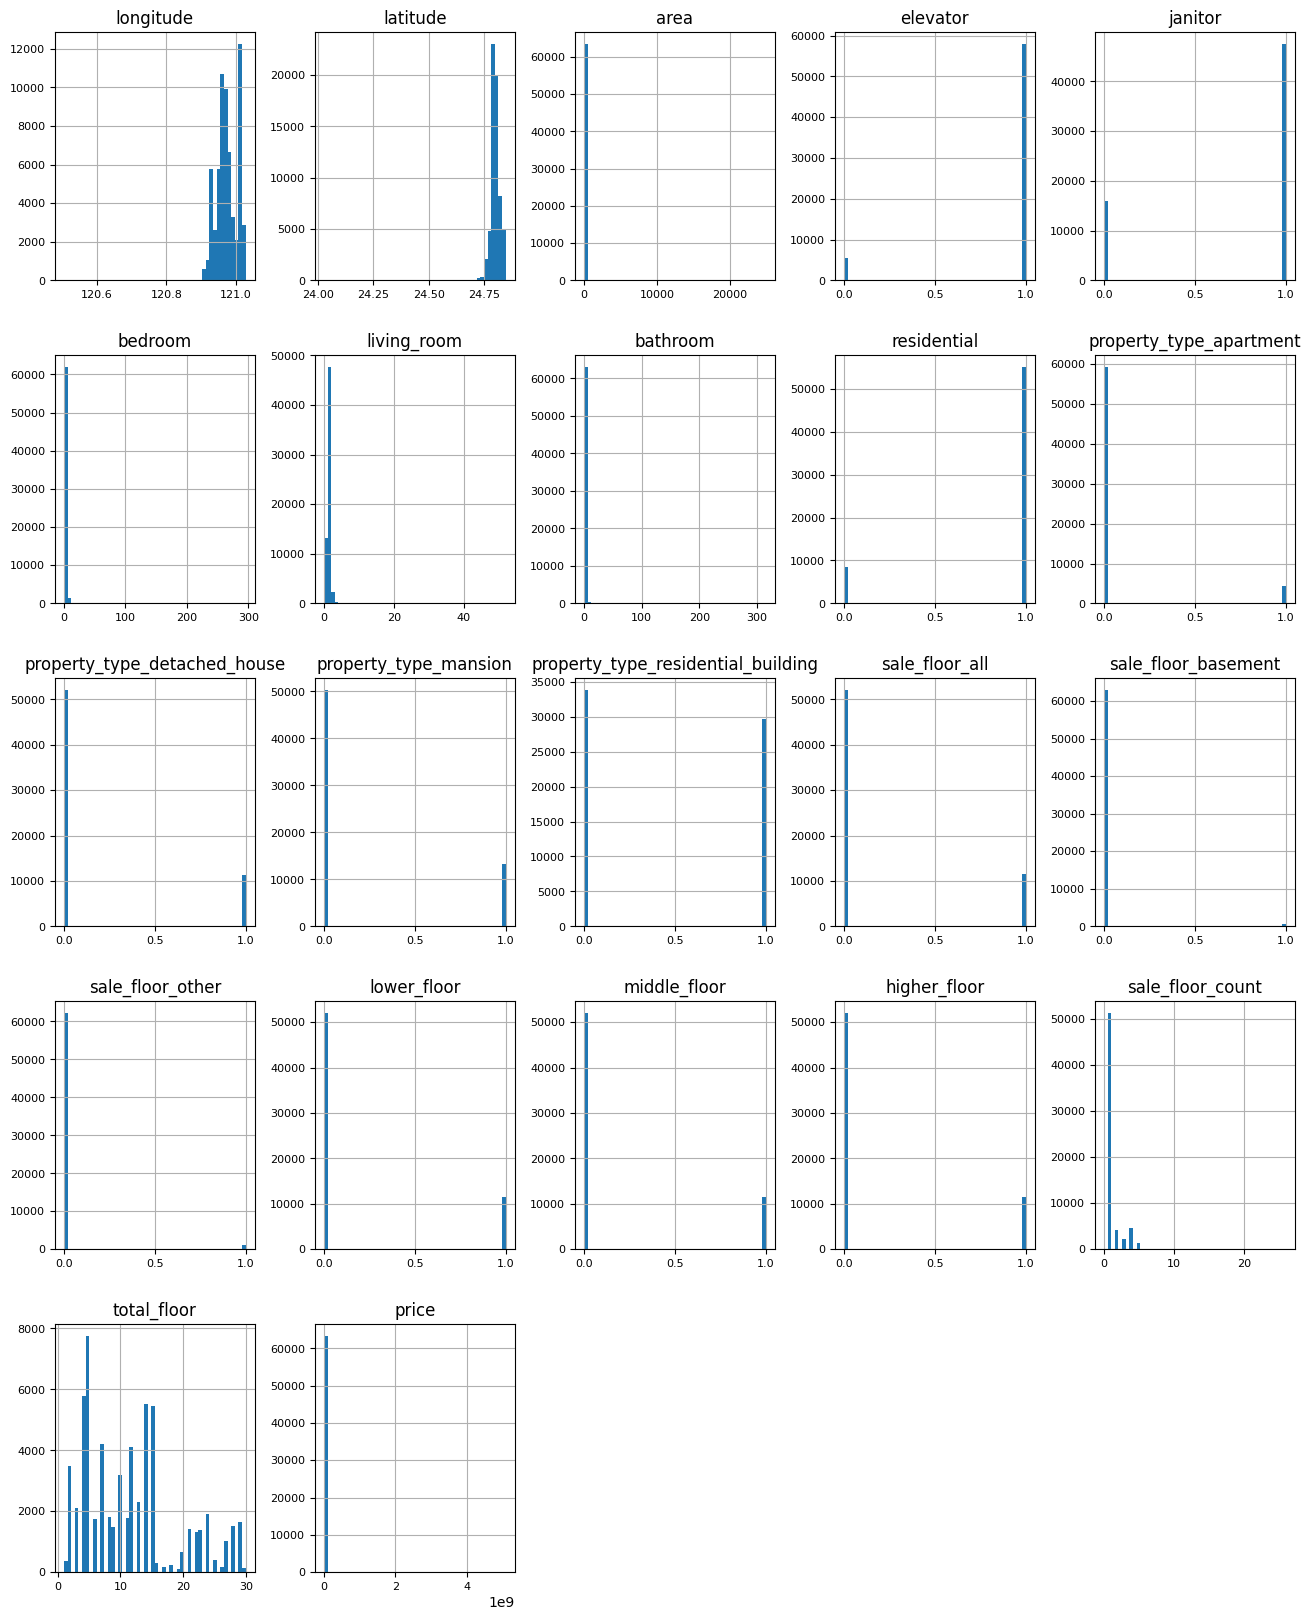

In [ ]:
df = rec_df.copy()
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

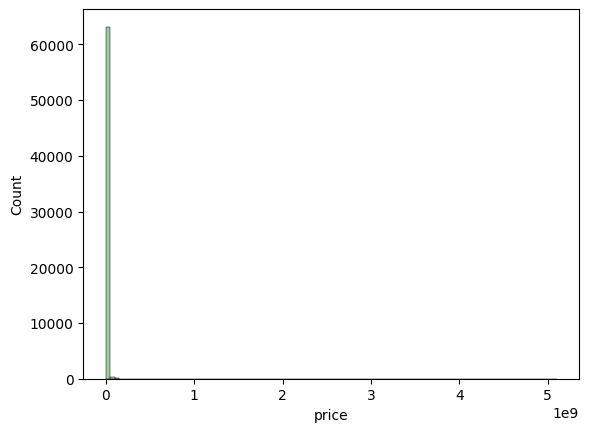

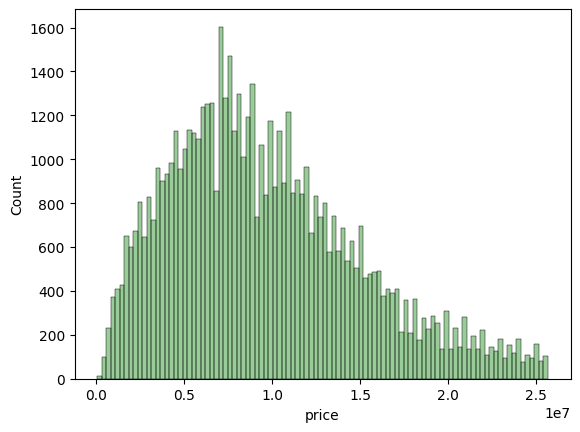

In [ ]:


sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

# 去掉 price 離群值
s = df['price'].describe()
IQR = s['75%'] - s['25%']
upper_bound = s['75%'] + IQR*1.5
lower_bound = s['25%'] - IQR*1.5
df = df[df['price'] < upper_bound]
df = df[df['price'] > lower_bound]

sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

In [ ]:
df['closing_year'] = df['closing_year'].astype(int)
for i in range(1, 11):
    filter_df = df[(df['closing_year'] > (112 - i))]
    filter_df.to_csv(f'./Basic-Preprocessed-Data/data-{i}-year.csv', index=False, encoding="utf_8_sig")

In [ ]:
stock_df = pd.read_csv(f'./^TWII.csv')
df = pd.read_csv(f'./Basic-Preprocessed-Data/data-10-year.csv')

def convert_roc_to_ad(date_str):
    parts = date_str.split('/')
    if len(parts) == 3:
        year = int(parts[0]) + 1911
        return f"{year}/{parts[1]}/{parts[2]}"
    else:
        return None

df['date'] = df['date'].apply(convert_roc_to_ad) 

df['date'] = pd.to_datetime(df['date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

df['YM'] = df['date'].dt.to_period('M')
stock_df['YM'] = stock_df['Date'].dt.to_period('M')

stock_df = stock_df[['YM', 'Close']]

df = pd.merge(df, stock_df, on='YM', how='left')

df = df.drop(columns=['date', 'YM'])
df = df.rename(columns={'Close': 'stock'})
price_column = df.pop('price')
df['price'] = price_column
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,stock,price
0,120.977695,24.807451,17,8.10,1,0,0,112,1,1,...,0,0,0,0,0,0,1,6,17433.849609,2250000
1,120.971866,24.817725,1,13.45,1,1,0,112,1,1,...,0,0,0,0,0,0,1,7,17433.849609,3630000
2,121.016387,24.784438,14,32.98,1,1,2,112,4,2,...,0,0,0,0,0,0,1,15,17433.849609,10000000
3,120.973963,24.819667,1,24.41,0,0,0,112,3,2,...,0,0,0,0,0,0,1,5,17433.849609,5000000
4,120.928663,24.840237,16,37.22,1,1,0,112,3,1,...,0,0,0,0,0,0,1,6,17433.849609,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60616,120.967645,24.807224,1,23.68,1,1,0,103,2,2,...,0,0,0,0,0,0,1,11,8462.570313,2380000
60617,121.017139,24.785206,5,63.49,1,1,2,103,4,2,...,0,0,0,0,0,0,1,14,8462.570313,14200000
60618,121.016428,24.791562,1,68.46,1,1,2,103,3,2,...,0,0,0,0,0,0,1,17,8462.570313,14900000
60619,121.016428,24.791562,1,65.91,1,1,2,103,3,2,...,0,0,0,0,0,0,1,17,8462.570313,14350000


In [ ]:
columns_to_normalize = ['stock', 'longitude', 'latitude', 'house_age','area', 'parking_space', 'bedroom', 'living_room', 'bathroom', 'sale_floor_count', 'total_floor']

# 使用MinMaxScaler進行MinMax 歸一化
min_max_scaler = MinMaxScaler()
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])
df[columns_to_normalize]

,stock,longitude,latitude,house_age,area,parking_space,bedroom,living_room,bathroom,sale_floor_count,total_floor
0,0.922571,0.902062,0.951127,0.024024,0.015588,0.00,0.03125,0.047619,0.009524,0.125,0.172414
1,0.922571,0.890937,0.963674,0.000000,0.025884,0.00,0.03125,0.047619,0.009524,0.125,0.206897
2,0.922571,0.975917,0.923021,0.019520,0.063468,0.10,0.12500,0.095238,0.019048,0.125,0.482759
3,0.922571,0.894939,0.966045,0.000000,0.046976,0.00,0.09375,0.095238,0.019048,0.125,0.137931
4,0.922571,0.808474,0.991167,0.022523,0.071628,0.00,0.09375,0.047619,0.019048,0.125,0.172414
...,...,...,...,...,...,...,...,...,...,...,...
60616,0.037676,0.882880,0.950849,0.000000,0.045571,0.00,0.06250,0.095238,0.009524,0.125,0.344828
60617,0.037676,0.977352,0.923958,0.006006,0.122183,0.10,0.12500,0.095238,0.019048,0.125,0.448276
60618,0.037676,0.975994,0.931721,0.000000,0.131748,0.10,0.09375,0.095238,0.019048,0.125,0.551724
60619,0.037676,0.975994,0.931721,0.000000,0.126840,0.10,0.09375,0.095238,0.019048,0.125,0.551724


## Heatmap

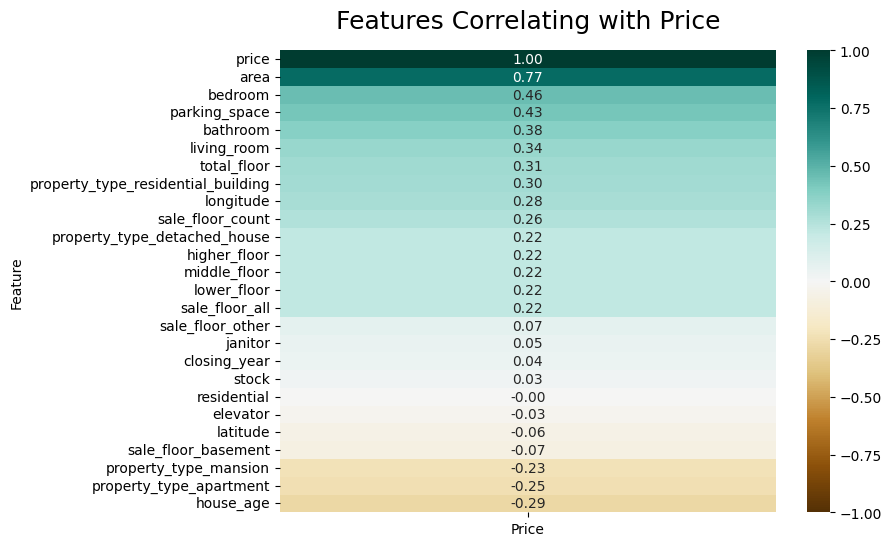

In [ ]:
price_corr = df.corrwith(df['price'])
price_corr_df = pd.DataFrame({'Feature': price_corr.index, 'Correlation': price_corr.values})

sorted_corr_matrix = price_corr_df.sort_values(by='Correlation', ascending=False)
sorted_features = sorted_corr_matrix['Feature'].values

sorted_corr_values = df[sorted_features].corrwith(df['price'])
sorted_corr_df = pd.DataFrame({'Feature': sorted_features, 'Correlation': sorted_corr_values})

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=sorted_corr_df.set_index('Feature'), annot=True, cmap='BrBG', fmt=".2f", vmax=1, vmin=-1)
heatmap .set_xticks([0.5])
heatmap.set_xticklabels(['Price'], rotation=0, fontsize=10)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
plt.show()

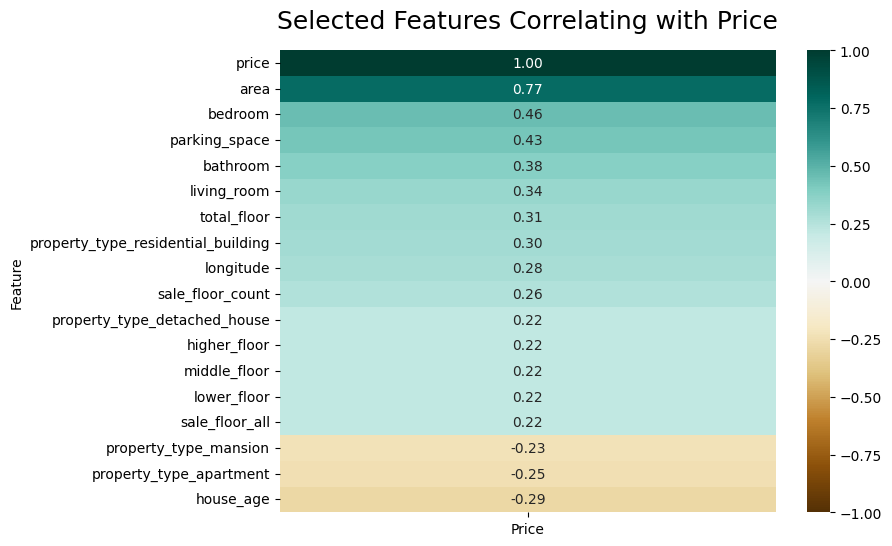

In [ ]:
mask = (sorted_corr_df['Correlation'] <= -0.1) | (sorted_corr_df['Correlation'] >= 0.1)
masked_corr_df = sorted_corr_df[mask]

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=masked_corr_df.set_index('Feature'), annot=True, cmap='BrBG', fmt=".2f", vmax=1, vmin=-1)
heatmap .set_xticks([0.5])
heatmap.set_xticklabels(['Price'], rotation=0, fontsize=10)
heatmap.set_title('Selected Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
plt.show()

In [ ]:
low_corr_features = sorted_corr_df[abs(sorted_corr_df['Correlation']) < 0.1]['Feature'].values
df_filtered = df.drop(low_corr_features, axis=1)
df_filtered

,longitude,house_age,area,parking_space,bedroom,living_room,bathroom,property_type_apartment,property_type_detached_house,property_type_mansion,property_type_residential_building,sale_floor_all,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,price
0,0.902062,0.024024,0.015588,0.00,0.03125,0.047619,0.009524,0,0,1,0,0,0,0,0,0.125,0.172414,2250000
1,0.890937,0.000000,0.025884,0.00,0.03125,0.047619,0.009524,0,0,1,0,0,0,0,0,0.125,0.206897,3630000
2,0.975917,0.019520,0.063468,0.10,0.12500,0.095238,0.019048,0,0,0,1,0,0,0,0,0.125,0.482759,10000000
3,0.894939,0.000000,0.046976,0.00,0.09375,0.095238,0.019048,1,0,0,0,0,0,0,0,0.125,0.137931,5000000
4,0.808474,0.022523,0.071628,0.00,0.09375,0.047619,0.019048,0,0,1,0,0,0,0,0,0.125,0.172414,8000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60616,0.882880,0.000000,0.045571,0.00,0.06250,0.095238,0.009524,0,0,0,0,0,0,0,0,0.125,0.344828,2380000
60617,0.977352,0.006006,0.122183,0.10,0.12500,0.095238,0.019048,0,0,0,0,0,0,0,0,0.125,0.448276,14200000
60618,0.975994,0.000000,0.131748,0.10,0.09375,0.095238,0.019048,0,0,0,1,0,0,0,0,0.125,0.551724,14900000
60619,0.975994,0.000000,0.126840,0.10,0.09375,0.095238,0.019048,0,0,0,1,0,0,0,0,0.125,0.551724,14350000


In [ ]:
# output normalized data
for i in range(1, 11):
    filtered_year_df = df[(df['closing_year'] > (112 - i))]
    filtered_year_df.to_csv(f'./Normalized-Data/data-{i}-year-normalized.csv', index=False, encoding="utf_8_sig")

In [ ]:
# output filterted data
for i in range(1, 11):
    df = pd.read_csv(f'./Normalized-Data/data-{i}-year-normalized.csv')
    df_filtered = df.drop(low_corr_features, axis=1)
    df_filtered.to_csv(f'./Legacy/Filtered-Features-Data/data-{i}-year-filtered-features.csv', index=False, encoding="utf_8_sig")

In [ ]:
# split the filetered and unfiltered data
for i in range(1, 11):
    df = pd.read_csv(f'./Legacy/Filtered-Features-Data/data-{i}-year-filtered-features.csv')
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    train_data.to_csv(f'./Legacy/Filtered-Data/Train/train-data-{i}-year.csv', index=False, encoding="utf_8_sig")
    test_data.to_csv(f'./Legacy/Filtered-Data/Test/test-data-{i}-year.csv', index=False, encoding="utf_8_sig")

    df = pd.read_csv(f'./Normalized-Data/data-{i}-year-normalized.csv')
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    train_data.to_csv(f'./Legacy/Unfiltered-Data/Train/train-data-{i}-year.csv', index=False, encoding="utf_8_sig")
    test_data.to_csv(f'./Legacy/Unfiltered-Data/Test/test-data-{i}-year.csv', index=False, encoding="utf_8_sig")

In [ ]:
# split the filetered and unfiltered data
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')
train_data = df[(df['closing_year'] <= 109) & (df['closing_year'] >= 103)]
train_data = train_data.drop(columns=['stock'])
train_data.to_csv(f'./1/Train/data-103-109.csv', index=False, encoding="utf_8_sig")
test_data = df[(df['closing_year'] <= 112) & (df['closing_year'] >= 110)]
test_data = test_data.drop(columns=['stock'])
test_data.to_csv(f'./1/Test/data-110-112.csv', index=False, encoding="utf_8_sig")

In [ ]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')

train_data = df[(df['closing_year'] <= 109) & (df['closing_year'] >= 103)]
train_data.to_csv(f'./2/Train/data-103-109.csv', index=False, encoding="utf_8_sig")
test_data = df[(df['closing_year'] <= 112) & (df['closing_year'] >= 110)];
test_data.to_csv(f'./2/Test/data-110-to-112.csv', index=False, encoding="utf_8_sig")
